In [1]:
import tifffile as tiff
import numpy as np

import os


from pathlib import *
from skimage import io
import matplotlib.pyplot as plt

In [2]:
impath=Path("I:\\XRD\XCT_CARL\\2023_10_3mm_tens_5047\\230928_SFB_IMM_BERNERS_5048-Export\Export")
# impath=Path('test_dust_remove_2.tiff')
tifs=impath.glob('*.tif')
asdf=list(tifs)

In [6]:
img_path=asdf[5]
asdf

[WindowsPath('I:/XRD/XCT_CARL/2023_10_3mm_tens_5047/230928_SFB_IMM_BERNERS_5048-Export/Export/230928_SFB1394_IMM_BERNERS_5048_6um_80kV_4s_LE3_recon-1.tif'),
 WindowsPath('I:/XRD/XCT_CARL/2023_10_3mm_tens_5047/230928_SFB_IMM_BERNERS_5048-Export/Export/230928_SFB1394_IMM_BERNERS_5048_6um_80kV_4s_LE3_recon-2.tif'),
 WindowsPath('I:/XRD/XCT_CARL/2023_10_3mm_tens_5047/230928_SFB_IMM_BERNERS_5048-Export/Export/230928_SFB1394_IMM_BERNERS_5048_6um_80kV_4s_LE3_recon_8bit.tif'),
 WindowsPath('I:/XRD/XCT_CARL/2023_10_3mm_tens_5047/230928_SFB_IMM_BERNERS_5048-Export/Export/230928_SFB1394_IMM_BERNERS_5048_6um_80kV_4s_LE3_recon_8bit_median.tif'),
 WindowsPath('I:/XRD/XCT_CARL/2023_10_3mm_tens_5047/230928_SFB_IMM_BERNERS_5048-Export/Export/230928_SFB1394_IMM_BERNERS_5048_6um_80kV_4s_LE3_recon_8bit_oxides.tif'),
 WindowsPath('I:/XRD/XCT_CARL/2023_10_3mm_tens_5047/230928_SFB_IMM_BERNERS_5048-Export/Export/230928_SFB1394_IMM_BERNERS_5048_6um_80kV_4s_LE3_recon_8bit_pores.tif')]

In [5]:
img=io.imread(img_path)

In [137]:
img_cropped=img[300:400,500:600,600:700]
img_cropped2=img[400:500,500:600,600:700]

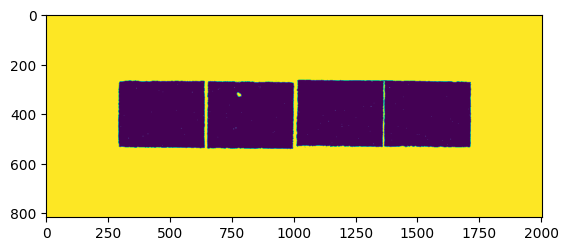

In [138]:
plt.imshow(img[:,500,:])

In [139]:
img_float=img_cropped/255
img_float2=img_cropped2/255

In [140]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage as ndi
from skimage import (filters, io, measure,
                      morphology, segmentation, transform,
                      util)
# import napari

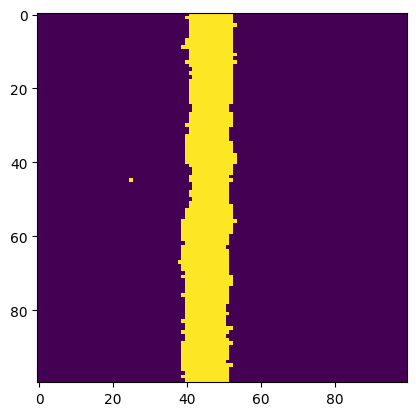

In [141]:
plt.imshow(img_float[:,1,:])
plt.imshow(img_float2[:,1,:])

In [177]:
labels=measure.label(img_float==0)
labels2=measure.label(img_float2==0)
labels2[labels2!=0]+=2

In [178]:
np.unique(labels),np.unique(labels2)

(array([0, 1, 2]), array([0, 3, 4]))

In [179]:
labels[labels==0]
labels2[labels2==0]

array([0, 0, 0, ..., 0, 0, 0])

In [180]:
joining=np.zeros((2,100,100))
joining[0,:,:]=labels[-1,:,:]
joining[1,:,:]=labels2[1,:,:]

In [181]:
labels.shape

(100, 100, 100)

In [182]:
labels[:,:,1].shape

(100, 100)

In [183]:
joining

array([[[1., 1., 1., ..., 2., 2., 2.],
        [1., 1., 1., ..., 2., 2., 2.],
        [1., 1., 1., ..., 2., 2., 2.],
        ...,
        [1., 1., 1., ..., 2., 2., 2.],
        [1., 1., 1., ..., 2., 2., 2.],
        [1., 1., 1., ..., 2., 2., 2.]],

       [[3., 3., 3., ..., 4., 4., 4.],
        [3., 3., 3., ..., 4., 4., 4.],
        [3., 3., 3., ..., 4., 4., 4.],
        ...,
        [3., 3., 3., ..., 4., 4., 4.],
        [3., 3., 3., ..., 4., 4., 4.],
        [3., 3., 3., ..., 4., 4., 4.]]])

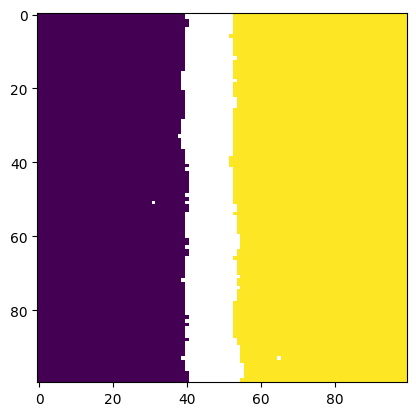

In [184]:
# figure
joining[joining==0]=np.nan
plt.imshow(np.sum(joining,axis=0))

In [189]:
j_lab=np.unique(joining)

In [194]:
lab2_n=np.unique(labels2)
# np.unique(labels)

In [195]:
j_lab-lab2_n[1]

array([-2., -1.,  0.,  1., nan])